<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be performing data wrangling.


## Objectives


In this lab you will perform the following:


-   Identify duplicate values in the dataset.

-   Remove duplicate values from the dataset.

-   Identify missing values in the dataset.

-   Impute the missing values in the dataset.

-   Normalize data in the dataset.


<hr>


## Hands on Lab


Import pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [21]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

## Finding duplicates


In this section you will identify duplicate values in the dataset.


 Find how many duplicate rows exist in the dataframe.


In [22]:
# Count the number of duplicate rows in the DataFrame
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 154


In [23]:
#How many duplicate values are there in the column Respondent? 
num_duplicate_respondents = df['Respondent'].duplicated().sum()
print("Number of duplicate values in the 'Respondent' column:", num_duplicate_respondents)

Number of duplicate values in the 'Respondent' column: 154


## Removing duplicates


Remove the duplicate rows from the dataframe.


In [24]:
# your code goes here
df.drop_duplicates(inplace=True)

Verify if duplicates were actually dropped.


In [25]:
# your code goes here
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


## Finding Missing values


Find the missing values for all columns.


In [26]:
# your code goes here
# Find and display missing values for all columns
missing_values = df.isnull().sum()
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64


Find out how many rows are missing in the column 'WorkLoc'


In [27]:
# Count the number of missing values in the 'WorkLoc' column
missing_workloc = df['WorkLoc'].isnull().sum()
print("Number of missing values in the 'WorkLoc' column:", missing_workloc)


Number of missing values in the 'WorkLoc' column: 32


## Imputing missing values


Find the  value counts for the column WorkLoc.


In [28]:
# your code goes here
workloc_counts = df['WorkLoc'].value_counts()
print("Value counts for the 'WorkLoc' column:")
print(workloc_counts)

Value counts for the 'WorkLoc' column:
Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64


Identify the value that is most frequent (majority) in the WorkLoc column.


In [29]:
#make a note of the majority value here, for future reference 6806
# Identify the most frequent value in the 'WorkLoc' column
#Office: 6806

Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.


In [30]:
# your c# Identify the most frequent value in the 'WorkLoc' column
most_frequent_workloc = df['WorkLoc'].value_counts().idxmax()

# Impute (replace) empty rows in the 'WorkLoc' column with the most frequent value
df['WorkLoc'].fillna(most_frequent_workloc, inplace=True)

After imputation there should ideally not be any empty rows in the WorkLoc column.


Verify if imputing was successful.


In [31]:
# your code goes here
# Verify the changes
print("Number of missing values in the 'WorkLoc' column after imputation:", df['WorkLoc'].isnull().sum())

Number of missing values in the 'WorkLoc' column after imputation: 0


## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". 

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


<hr>


List out the various categories in the column 'CompFreq'


In [32]:
# your code goes here
# List out the various categories in the 'CompFreq' column
compfreq_categories = df['CompFreq'].unique()
print("Categories in the 'CompFreq' column:")
print(compfreq_categories)


Categories in the 'CompFreq' column:
['Yearly' 'Monthly' 'Weekly' nan]


Create a new column named 'NormalizedAnnualCompensation'. Use the hint given below if needed.


Double click to see the **Hint**.

<!--

Use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

If the CompFreq is Yearly then use the exising value in CompTotal
If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)

-->


In [33]:
df['NormalizedAnnualCompensation'] = df.apply(
    lambda row: row['CompTotal'] if row['CompFreq'] == 'Yearly' else (
        row['CompTotal'] * 12 if row['CompFreq'] == 'Monthly' else (
            row['CompTotal'] * 52 if row['CompFreq'] == 'Weekly' else None
        )
    ),
    axis=1
)

# Display the updated DataFrame with the new column
print(df[['CompFreq', 'CompTotal', 'NormalizedAnnualCompensation']].head())


  CompFreq  CompTotal  NormalizedAnnualCompensation
0   Yearly    61000.0                       61000.0
1   Yearly   138000.0                      138000.0
2   Yearly    90000.0                       90000.0
3  Monthly    29000.0                      348000.0
4   Yearly    90000.0                       90000.0


In [34]:

# Print the number of rows in the updated DataFrame
num_rows_after_deduplication = df.shape[0]
print("Number of rows after removing duplicates:", num_rows_after_deduplication)


Number of rows after removing duplicates: 11398


In [35]:
# Calculate the number of unique rows in the 'Respondent' column
num_unique_respondents = df['Respondent'].nunique()

# Print the result
print("Number of unique rows in the 'Respondent' column after removing duplicates:", num_unique_respondents)

Number of unique rows in the 'Respondent' column after removing duplicates: 11398


In [36]:
# Calculate the number of blank rows in the 'EdLevel' column
num_blank_edlevel = df['EdLevel'].isnull().sum()

# Print the result
print("Number of blank rows in the 'EdLevel' column after removing duplicates:", num_blank_edlevel)


Number of blank rows in the 'EdLevel' column after removing duplicates: 112


In [37]:
# Calculate the number of missing rows in the 'Country' column
num_missing_country = df['Country'].isnull().sum()

# Print the result
print("Number of missing rows in the 'Country' column after removing duplicates:", num_missing_country)


Number of missing rows in the 'Country' column after removing duplicates: 0


In [38]:
# Display the value counts for the 'Employment' column
employment_counts = df['Employment'].value_counts()

# Identify the majority category
majority_employment_category = employment_counts.idxmax()

# Print the result
print("Majority category under the 'Employment' column:", majority_employment_category)


Majority category under the 'Employment' column: Employed full-time


In [39]:
# Display the value counts for the 'UndergradMajor' column
undergrad_major_counts = df['UndergradMajor'].value_counts()

# Identify the category with the minimum number of rows
min_rows_category = undergrad_major_counts.idxmin()

# Print the result
print("Category with the minimum number of rows under the 'UndergradMajor' column:", min_rows_category)


Category with the minimum number of rows under the 'UndergradMajor' column: A health science (ex. nursing, pharmacy, radiology)


In [40]:
# Calculate the mean of the 'ConvertedComp' column
mean_comp = df['ConvertedComp'].mean()

# Impute missing values in 'ConvertedComp' with the mean
df['ConvertedComp'].fillna(mean_comp, inplace=True)

# Verify the changes
print("Number of missing values in the 'ConvertedComp' column after imputation:", df['ConvertedComp'].isnull().sum())


Number of missing values in the 'ConvertedComp' column after imputation: 0


In [41]:
# Count the number of unique values in the 'CompFreq' column
unique_compfreq_values = df['CompFreq'].nunique()

# Print the result
print("Number of unique values in the 'CompFreq' column:", unique_compfreq_values)


Number of unique values in the 'CompFreq' column: 3


In [42]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Count the number of respondents being paid yearly
yearly_paid_count = df[df['CompFreq'] == 'Yearly'].shape[0]

# Print the result
print("Number of respondents being paid yearly:", yearly_paid_count)


Number of respondents being paid yearly: 6073


In [43]:
# Calculate the median of the 'NormalizedAnnualCompensation' column
median_normalized_compensation = df['NormalizedAnnualCompensation'].median()

# Print the result
print("Median NormalizedAnnualCompensation:", median_normalized_compensation)


Median NormalizedAnnualCompensation: 100000.0


In [44]:
# Calculate the median age of survey respondents
median_age = df['Age'].median()

# Print the result
print("Median Age of survey respondents:", median_age)


Median Age of survey respondents: 29.0


In [48]:
# Calculate the median 'ConvertedComp' for 'Woman' respondents using groupby
median_converted_comp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()

# Print the result
print("Median ConvertedComp for respondents who identified as 'Woman':", median_converted_comp_woman)


Median ConvertedComp for respondents who identified as 'Woman': 61071.0


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<AxesSubplot:xlabel='ConvertedComp'>

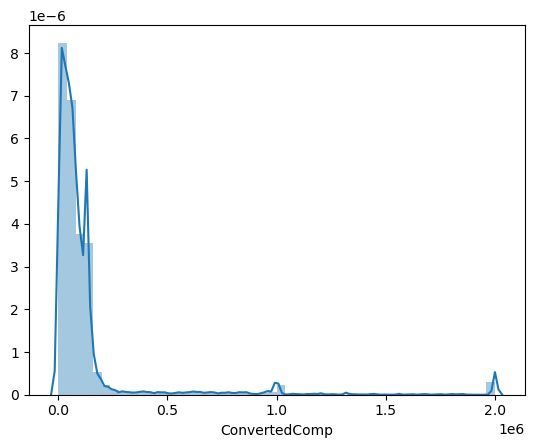

In [50]:
sns.distplot(df.ConvertedComp)

(array([10475.,   238.,   115.,   125.,    99.,   131.,    34.,    15.,
           15.,   151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

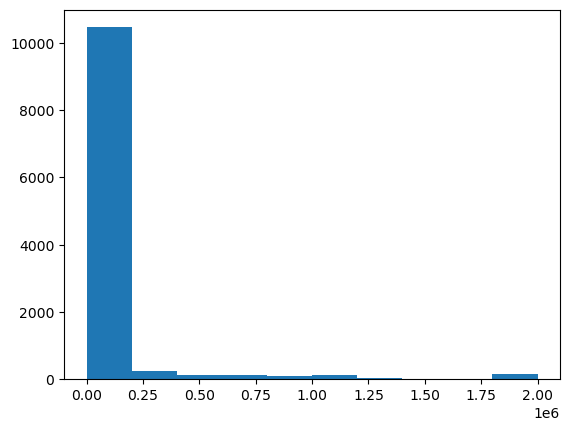

In [52]:
#Histogram
plt.hist(df.ConvertedComp)

In [53]:
df.ConvertedComp.median()

63016.0

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
